In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import mplcyberpunk
plt.style.use("cyberpunk")

|column|Description|
|----|---|
|Doctor Name| The full name of the healthcare professional.|
|City| The city in which the doctor's clinic is based, providing geographical context.|
|Specialization| The specific area of medical expertise or specialization of the doctor.|
|Doctor Qualification| The highest educational qualification attained by the doctor.|
|Experience(Years)| The total number of years of professional experience the doctor has accumulated.|
|Total_Reviews| The cumulative number of reviews given by patients, reflecting the overall feedback received.|
|Patient Satisfaction Rate(%age)| The percentage indicating the level of satisfaction reported by patients who have received medical care from the doctor.|
|Avg Time to Patients(mins)| The average amount of time the doctor spends with each patient during consultations.|
|Wait Time(mins)| The average waiting time experienced by patients at the clinic before their consultation.|
|Hospital Address| The name and location of the hospital or clinic where the doctor practices.|
|Doctors Link| An online access link or platform where patients can connect with the doctor, reflecting the growing trend of digital healthcare.|
|Doctor Fee(PKR)| The fee charged by the doctor for their services, measured in Pakistani Rupees (PKR).|

In [2]:
df = pd.read_csv("DoctorFeePrediction.csv")

## Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2386 non-null   object 
 1   City                             2386 non-null   object 
 2   Specialization                   2386 non-null   object 
 3   Doctor Qualification             2386 non-null   object 
 4   Experience(Years)                2386 non-null   float64
 5   Total_Reviews                    2386 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2386 non-null   int64  
 7   Avg Time to Patients(mins)       2386 non-null   int64  
 8   Wait Time(mins)                  2386 non-null   int64  
 9   Hospital Address                 2386 non-null   object 
 10  Doctors Link                     2386 non-null   object 
 11  Fee(PKR)                         2386 non-null   int64  
dtypes: float64(1), int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience(Years),2386.0,11.844719,8.784449,1.0,6.0,10.0,14.0,53.0
Total_Reviews,2386.0,92.473177,282.162526,0.0,0.0,8.0,54.0,5147.0
Patient Satisfaction Rate(%age),2386.0,96.657586,4.962300,33.0,94.0,98.0,100.0,100.0
Avg Time to Patients(mins),2386.0,14.092205,2.722198,3.0,14.0,14.0,15.0,50.0
Wait Time(mins),2386.0,11.264459,5.636885,0.0,10.0,11.0,11.0,82.0
Fee(PKR),2386.0,1201.016764,831.760021,0.0,600.0,1000.0,1500.0,10000.0


In [5]:
df.head(4)

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,500
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800


## Handling "& amp;"

In [6]:
df['Specialization'] = df['Specialization'].str.replace('&amp;', '&')
df['Doctor Qualification'] = df['Doctor Qualification'].str.replace('&amp;', '&')
df['Hospital Address'] = df['Hospital Address'].str.replace('&amp;', '&')
df.head()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,500
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae & Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800
4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500


## Checking simple duplicates

In [7]:
new_df=df[~df.duplicated()].reset_index(drop=True)

In [8]:
new_df

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,500
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae & Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800
4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500
...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Dr. Amna Rizwan,LAHORE,"Eye Specialist, Eye Surgeon","MBBS, FCPS (VITREO-RETINA)",10.0,11,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",https://www.marham.pk/doctors/lahore/eye-speci...,1000
2369,Dr. Misbah Fatima,OKARA,Pediatrician,"MBBS, FCPS (Pediatrics)",10.0,7,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",https://www.marham.pk/doctors/okara/pediatrici...,1000
2370,Dr. Muhammad Kashif,RAHIM-YAR-KHAN,Dermatologist,"MBBS, Fellow American Aesthetic Association.",10.0,103,95,15,12,"Moosa Skin & Laser Clinic, punjab, Rahim Yar Khan",https://www.marham.pk/doctors/sadiqabad/dermat...,1000
2371,Asst. Prof. Dr. Ahmed Ayyaz,SAHIWAL,Nephrologist,"MBBS, MD (Nephrology)",12.0,23,100,14,12,"Sahiwal International Hospital, Near General B...",https://www.marham.pk/doctors/sahiwal/nephrolo...,1500


## Preprocessing 'Doctor Name' Column

In [9]:
temp=new_df["Doctor Name"][0].split()

In [10]:
def get_title(x):
    return x[0]

In [11]:
new_df["Doctor Name"].value_counts().reset_index()

,index,Doctor Name
0,Dr. Muhammad Amjad,4
1,Asst. Prof. Dr. Mujahid Israr,4
2,Dr. Asim Munir Alvi Consultant Endocrinologist,3
3,Dr. Muhammad Saddiq Haris,3
4,Asst. Prof. Dr. Shoaib Manzoor,3
...,...,...
2185,Dr. Haji Saleem,1
2186,Asst. Prof. Dr. Mohammad Aslam Mengal,1
2187,Dr. Fayaz Hussain,1
2188,Prof. Dr. Shumaila Tanveer,1


In [12]:
UniqueTitle = set(new_df["Doctor Name"].value_counts().reset_index()["index"].str.lower().str.strip().str.split(".").apply(lambda x : get_title(x)).to_list())
new_df["Doctors Title"]=new_df["Doctor Name"].str.lower().str.strip().str.split(".").apply(lambda x : get_title(x)).str.capitalize()

In [13]:
new_df["Doctor Name"]=new_df["Doctor Name"].str.lower().str.strip().str.title()

In [14]:
new_df[new_df["Doctor Name"]=="Mohammad Zafar Iqbal"]

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),Doctors Title
79,Mohammad Zafar Iqbal,KASUR,"Psychologist, Homeopath, Sexologist","MSc (Psychology), DIP (Sexology), DHMS, Intern...",25.0,139,95,14,11,"KHAWB KONSULTINGS Health &wellbeing, Mustafaba...",https://www.marham.pk/doctors/kasur/psychologi...,3500,Mohammad zafar iqbal


In [15]:
UniqueTitle

{'assoc', 'asst', 'dr', 'mohammad zafar iqbal', 'prof'}

In [16]:
## Later for encoding
doctors_rank={
    "Prof":3,
    "Assoc":2,
    "Asst":2,
    "Dr":1
}

### After a comapring to other doctors who are have similarties with Doctor "Mohammad Zafar Iqbal" qualifications and specialization we decided to assign a Dr value to his title

In [17]:
new_df.loc[new_df["Doctor Name"]=="Mohammad Zafar Iqbal"]

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),Doctors Title
79,Mohammad Zafar Iqbal,KASUR,"Psychologist, Homeopath, Sexologist","MSc (Psychology), DIP (Sexology), DHMS, Intern...",25.0,139,95,14,11,"KHAWB KONSULTINGS Health &wellbeing, Mustafaba...",https://www.marham.pk/doctors/kasur/psychologi...,3500,Mohammad zafar iqbal


In [18]:
new_df.loc[new_df["Doctor Name"]=="Mohammad Zafar Iqbal",["Doctors Title"]]="Dr"


In [19]:
new_df[new_df["Doctor Name"]=="Mohammad Zafar Iqbal"]["Doctors Title"]

79    Dr
Name: Doctors Title, dtype: object

In [20]:
new_df["Doctors Title"].unique()

array(['Dr', 'Prof', 'Assoc', 'Asst'], dtype=object)

-----------


## Preprocessing City column

In [21]:
new_df.City.value_counts()

LAHORE                 151
KARACHI                150
ISLAMABAD              146
PESHAWAR               134
MULTAN                 126
                      ... 
TANDO-MUHAMMAD-KHAN      1
KASHMOR                  1
DINGA                    1
SAMUNDRI                 1
PATTOKI                  1
Name: City, Length: 117, dtype: int64

In [22]:
new_df.City.str.lower().str.strip().value_counts()

lahore                 151
karachi                150
islamabad              146
peshawar               134
multan                 126
                      ... 
tando-muhammad-khan      1
kashmor                  1
dinga                    1
samundri                 1
pattoki                  1
Name: City, Length: 117, dtype: int64

## Preprocessing Specialization Column

In [23]:
Nospace=""
QualSeprator=","
Specialization=dict()

def join_special(word_list:list):
    
    for i,word in enumerate(word_list):
        word_list[i]=str(word_list[i]).strip()
        word_list[i]=Nospace.join(word_list[i])

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)

        if word_list[i]=="" or word_list[i]==" ":
            found=True
            
            word_list.remove(word_list[i])
            continue
            
        if word_list[i] in Specialization:
            Specialization[word_list[i]]+=1
        else:
            Specialization[word_list[i]]=1
    
    
    

    return QualSeprator.join(word_list[:])

def specialLen(word_list:list):
    
    for i,word in enumerate(word_list):
        word_list[i]=str(word_list[i]).strip()
        word_list[i]=Nospace.join(word_list[i])

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)

        if word_list[i]=="" or word_list[i]==" ":
            found=True
            
            word_list.remove(word_list[i])
            continue

    return len(word_list)

In [24]:
new_df["Specialization"]=new_df["Specialization"].str.lower().str.strip().str.split(",").apply(lambda x : join_special(x))
new_df["Specialization_No"]=new_df["Specialization"].str.strip().str.split(",").apply(lambda x : specialLen(x))

# UniqueTitle = set(new_df["Specialization"].value_counts().reset_index()["index"].str.lower().str.strip().str.split(".").apply(lambda x : get_title(x)).to_list())


In [25]:
Specialization
len(list({k: v for k, v in sorted(Specialization.items(), key=lambda item: item[1])}.items()))

62

## Processing the Doctor Qualification Column

|Problem|Case|Handling|
|-|-|-|
|We find the same value written 2 times differently so we handled this issue|(MBBS) 332 <br> ( MBBS)                             78|we tried stripping the text in cell as one part|
|Values are the same but not considered as 1|(MBBS, FCPS)                              133 <br> (MBBS,FCPS)                                68|We tried to split using "," as our delimeter|
|Some values can be the same but due to the spaces or other reasons|MBBS, FCPS (Obstetrics & Gynecology)      39<br>MBBS , FCPS (Obstetrics & Gynecology)     18|So we iterated on each word after splitting the cell words and we strip and split and then join the splitted part of the word so that we get the same word|

During our preprocess for this column we calculated a dictionary with the frequency of every qualification in this dataset


In [26]:
new_df["Doctor Qualification"].value_counts().head()

MBBS                             332
MBBS, FCPS                       133
 MBBS                             78
MBBS,FCPS                         68
MBBS, FCPS (Gastroenterology)     40
Name: Doctor Qualification, dtype: int64

In [27]:
spaces=","
new_df["Doctor Qualification"].str.strip().value_counts().sort_values(ascending=False)[:30]

MBBS                                      410
MBBS, FCPS                                133
MBBS,FCPS                                  68
MBBS, FCPS (Gastroenterology)              40
MBBS, FCPS (Obstetrics & Gynecology)       39
MBBS, FCPS (Orthopedic Surgery)            38
MBBS, FCPS (Urology)                       36
MBBS, FCPS (Dermatology)                   33
MBBS, FCPS (Neurology)                     24
MBBS, FCPS (Pulmonology)                   24
MBBS, FCPS (Neuro Surgery)                 22
MBBS, MCPS                                 18
MBBS, FCPS (Pediatrics)                    18
MBBS , FCPS (Obstetrics & Gynecology)      18
MBBS , FCPS (Orthopedic Surgery)           17
MBBS, FCPS (Nephrology)                    17
MBBS , FCPS                                17
MD                                         16
MBBS, FCPS (Orthopaedic Surgery)           15
MBBS, MS (Urology)                         14
MBBS , FCPS (Urology)                      12
MBBS, MCPS, FCPS                  

In [28]:
space=""
QualSeprator=","
Qual_freq=dict()
def join_qual(word_list:list):

    removeing_index=[]
    found=False
    for i,word in enumerate(word_list):
        Strip_Split=str(word_list[i]).strip().split()
        for ind in range (len(Strip_Split)):
            Strip_Split[ind]=Strip_Split[ind].strip()
        word_list[i]=space.join(Strip_Split)

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)
        if word_list[i]=="" or word_list[i]==" ":
            found=True
            removeing_index.append(word_list[i])
            
            continue
            
        if word_list[i] in Qual_freq:
            Qual_freq[word_list[i]]+=1
        else:
            Qual_freq[word_list[i]]=1
    if found:
        for ind in removeing_index:
            word_list.remove(ind)
    
    

    return QualSeprator.join(word_list[:])

def getLen(word_list:list):
    
    for i,word in enumerate(word_list):
        word_list[i]=str(word_list[i]).strip().split()
        word_list[i]=space.join(word_list[i])

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)
        if word_list[i]=="" or word_list[i]==" ":
            found=True    
            word_list.remove(word_list[i])
            continue
    
    
    

    return len(word_list)

new_df["Doctor Qualification"]=new_df["Doctor Qualification"].str.lower().str.replace(']','}').str.replace('[','{').str.replace('(','{').str.replace(')',"}").str.strip().str.split(",").apply(join_qual)
new_df["Doctor_Qualification_No"]=new_df["Doctor Qualification"].str.lower().str.replace(']','}').str.replace('[','{').str.replace('(','{').str.replace(')',"}").str.strip().str.split(",").apply(getLen)
new_df["Doctor Qualification"].value_counts()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_62160\3471906857.py:62: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df["Doctor Qualification"]=new_df["Doctor Qualification"].str.lower().str.replace(']','}').str.replace('[','{').str.replace('(','{').str.replace(')',"}").str.strip().str.split(",").apply(join_qual)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_62160\3471906857.py:63: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df["Doctor_Qualification_No"]=new_df["Doctor Qualification"].str.lower().str.replace(']','}').str.replace('[','{').str.replace('(','{').str.replace(')',"}").str.strip().str.split(",").apply(getLen)


mbbs                                                                                     412
mbbs,fcps                                                                                220
mbbs,fcps{obstetrics&gynecology}                                                          61
mbbs,fcps{orthopedicsurgery}                                                              58
mbbs,fcps{urology}                                                                        55
                                                                                        ... 
mbbs,fcps{ophthalmologist}                                                                 1
mbbs,cps{neurosurgery},ms,fellowshipneurosurgery{usa},fellowshipneurosurgery{germany}      1
mbbs,fcps{urology},dip{urology}                                                            1
mbbs,md1                                                                                   1
mbbs,fcps{vitreo-retina}                                              

In [29]:
new_df["Doctor_Qualification_No"]

0       2
1       1
2       4
3       2
4       3
       ..
2368    2
2369    2
2370    2
2371    2
2372    2
Name: Doctor_Qualification_No, Length: 2373, dtype: int64

In [30]:
Qual_freq
list({k: v for k, v in sorted(Qual_freq.items(), key=lambda item: item[1])}.items())

[('fcps{otorhinolaryngologicent}', 1),
 ('cfp{usa}', 1),
 ('certifiedincovid19+', 1),
 ('fcps{gynae&obstetrics}', 1),
 ('certified{aestheticmedicine}', 1),
 ('mcps*{urology}', 1),
 ('traininggeriatricmedicineuk', 1),
 ('generalphysician', 1),
 ('aestheticphysician', 1),
 ('andmbbs', 1),
 ('fcps{neurology}fcps{medicine}', 1),
 ('m.s{urology}', 1),
 ('diplomainpediatrics', 1),
 ('fellowshipinpediatrics', 1),
 ('memberofcollegeofphysiciansandsurgeonspakistan', 1),
 ('mcps{cont.}', 1),
 ('faaos', 1),
 ('diplomateamericanboardoforthopaedicsurgery', 1),
 ('diplomateofamericanboardofneurology', 1),
 ('fcps*{neurology}', 1),
 ('ms{masterofsurgery}', 1),
 ('fellowshipinaestheticmedicine', 1),
 ('diplomaivfandreproductivehealth{uksh}', 1),
 ('dipinurogynaecology{kiel}', 1),
 ('dipgynaecologyendoscopy{uksh}', 1),
 ('mastercertifiedinfetalcardiotocography', 1),
 ('professionaldiplomainaestheticgynaecologyandsexualwellbeing{iaagsw-uk}certifiedinhealthprofessionalseducation',
  1),
 ('diplomachildhe

## Processing the Doctors Link column

In [31]:
new_df["Doctors Link"]=new_df["Doctors Link"].str.lower().str.strip().str.replace(" ",'')

In [32]:
new_df["Doctors Link"].value_counts()

nolinkavailable                                                                                                                645
https://www.marham.pk/doctors/lahore/gastroenterologist/asst-prof-dr-mujahid-israr#reviews-scroll                                4
https://www.marham.pk/doctors/hyderabad/pulmonologist/asst-prof-dr-mubeen-ahmed-memon#reviews-scroll                             3
https://www.marham.pk/doctors/haripur/neuro-physician/dr-zahid-hassan#reviews-scroll                                             3
https://www.marham.pk/doctors/rahim-yar-khan/general-physician/dr-asim-munir-alvi-consultant-endocrinologist#reviews-scroll      3
                                                                                                                              ... 
https://www.marham.pk/doctors/faisalabad/pediatrician/dr-ayesha-ghaffar#reviews-scroll                                           1
https://www.marham.pk/doctors/islamabad/ent-specialist/prof-dr-r-brigadier-amer-sab

### Encoding Doctors Link column

In [33]:
new_df["OnlineAccess"]=np.int16(new_df["Doctors Link"]!="nolinkavailable")

In [34]:
new_df["OnlineAccess"].value_counts()

1    1728
0     645
Name: OnlineAccess, dtype: int64

## Handling Clincs using Doctors Data

In [35]:

def getClincs(Name):
    ClincsCount= len(new_df[(new_df["Doctor Name"]==Name["Doctor Name"])&
        (new_df["Doctor Qualification"]==Name["Doctor Qualification"])&
        (new_df["Experience(Years)"]==Name["Experience(Years)"])&
        (new_df["Total_Reviews"]==Name["Total_Reviews"])&
        (new_df["Patient Satisfaction Rate(%age)"]==Name["Patient Satisfaction Rate(%age)"])])
    
    new_df.loc[(new_df["Doctor Name"]==Name["Doctor Name"])&
        (new_df["Doctor Qualification"]==Name["Doctor Qualification"])&
        (new_df["Experience(Years)"]==Name["Experience(Years)"])&
        (new_df["Total_Reviews"]==Name["Total_Reviews"])&
        (new_df["Patient Satisfaction Rate(%age)"]==Name["Patient Satisfaction Rate(%age)"]),["Clincs Count"]]=ClincsCount

In [36]:
doc_df=new_df.loc[:,["Doctor Name","Doctor Qualification","Specialization","Experience(Years)","Total_Reviews","Patient Satisfaction Rate(%age)"]]
doc_val_count=doc_df.value_counts()
docsDf=doc_val_count.reset_index()

for doctorData in range(docsDf.shape[0]):
    getClincs(docsDf.iloc[doctorData])

In [37]:
new_df["Clincs Count"].value_counts()

1.0    2118
2.0     224
3.0      27
4.0       4
Name: Clincs Count, dtype: int64

In [38]:

# duplicates_Mask=new_df.loc[:,["Doctor Name","City","Doctors Link","Hospital Address"]].duplicated()
# duplicated_Docs=new_df[duplicates_Mask].sort_values(by="Doctor Name")["Doctor Name"].tolist()

# for doctor in duplicated_Docs:
#     doc_recs=new_df[new_df["Doctor Name"]==doctor]
#     for column in new_df.columns:
#         if doc_recs[column].duplicated().sum() == 0 :
#             continue
#         else:
            
#             if (doc_recs[column].dtype == np.int64) | (doc_recs[column].dtype == np.float64):
#                 print(f"Found {len(doc_recs)} records for this doctor {doctor} and the mean of the data is: {doc_recs[column].mean()}\n",doc_recs[column])
#             else:
#                 print(f"Found {len(doc_recs)} records for this doctor {doctor} the data is:\n",doc_recs[column])


## Hospital Address

In [39]:
RandomForestRegressor()

RandomForestRegressor()

In [40]:
new_df["Hospital Address"].value_counts()

No Address Available                                                     552
Rehman Medical Institute Hospital, Hayatabad, Peshawar                    21
City International Hospital, Zarghon Road, Quetta                         16
Faisal Hospital, Peoples Colony, Faisalabad                               12
Saleem Medical Complex Hospital, Quetta City, Quetta                      11
                                                                        ... 
Dhq Hospital, Charsadda city, Charsadda                                    1
Heart Centre Jhelum, Machine Mohalla No.3 Jhelum, OLD GT road, Jhelum      1
Khan surgical hospital, Model Town, Bahawalpur                             1
Sohail Surgimed Hospital, mehmda chowk, Gujrat                             1
Sahiwal International Hospital, Near General Bus Stand, Sahiwal            1
Name: Hospital Address, Length: 1178, dtype: int64

In [41]:
new_df["Hospital Address"]=new_df["Hospital Address"].str.lower().str.strip().str.replace(" ",'')

In [42]:
new_df["Hospital Address"].value_counts()

noaddressavailable                                          552
rehmanmedicalinstitutehospital,hayatabad,peshawar            21
cityinternationalhospital,zarghonroad,quetta                 16
faisalhospital,peoplescolony,faisalabad                      12
saleemmedicalcomplexhospital,quettacity,quetta               11
                                                           ... 
tariqhospital,saryabroad,quetta                               1
ayanmedicosecenter,usmanabadroad,nowshera                     1
nationalhospital,muhammadpura,sialkot                         1
nelsonmedicalcomplex,abidmajeedroad,rawalpindi                1
sahiwalinternationalhospital,neargeneralbusstand,sahiwal      1
Name: Hospital Address, Length: 1176, dtype: int64

In [43]:
new_df["inHospital"]=np.int16(new_df["Hospital Address"]!="noaddressavailable")

In [44]:
new_df["inHospital"].value_counts()

1    1821
0     552
Name: inHospital, dtype: int64

In [45]:
RandomForestRegressor()

RandomForestRegressor()

In [46]:
new_df

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),Doctors Title,Specialization_No,Doctor_Qualification_No,OnlineAccess,Clincs Count,inHospital
0,Dr. Umair Hafeez,GUJRANWALA,ent specialist,"mbbs,fcps{otorhinolaryngologicent}",6.0,11,100,19,6,"centralhospital,jinnahcolony,gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000,Dr,1,2,1,1.0,1
1,Dr. Haris Shakeel,RAJAN-PUR,general physician,mbbs,1.0,0,94,14,11,noaddressavailable,nolinkavailable,500,Dr,1,1,0,1.0,0
2,Dr. Iqra Rehman,MIRPUR-KHAS,general physician,"mbbs,rmp,cfp{usa},certifiedincovid19+",6.0,9,100,10,0,"rehmanclinic,tandoadamnaka,mirpurkhas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000,Dr,1,4,1,1.0,1
3,Dr. Erum Memon,HYDERABAD,gynecologist,"mbbs,fcps{gynae&obstetrics}",11.0,71,96,18,10,"mehmoodhospital,qasimabad,hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800,Dr,1,2,1,1.0,1
4,Dr. Aisha Ahmad,LAHORE,dermatologist,"mbbs,fcps{dermatology},certified{aestheticmedi...",12.0,199,100,16,2,"skinnovation,johartown,lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500,Dr,1,3,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Dr. Amna Rizwan,LAHORE,"eye specialist,eye surgeon","mbbs,fcps{vitreo-retina}",10.0,11,100,14,11,"wahdatclinic,wahdatroad,lahore",https://www.marham.pk/doctors/lahore/eye-speci...,1000,Dr,2,2,1,1.0,1
2369,Dr. Misbah Fatima,OKARA,pediatrician,"mbbs,fcps{pediatrics}",10.0,7,100,14,11,"zayyankidneyandchildcareclinic,okara,okara",https://www.marham.pk/doctors/okara/pediatrici...,1000,Dr,1,2,1,1.0,1
2370,Dr. Muhammad Kashif,RAHIM-YAR-KHAN,dermatologist,"mbbs,fellowamericanaestheticassociation.",10.0,103,95,15,12,"moosaskin&laserclinic,punjab,rahimyarkhan",https://www.marham.pk/doctors/sadiqabad/dermat...,1000,Dr,1,2,1,2.0,1
2371,Asst. Prof. Dr. Ahmed Ayyaz,SAHIWAL,nephrologist,"mbbs,md{nephrology}",12.0,23,100,14,12,"sahiwalinternationalhospital,neargeneralbussta...",https://www.marham.pk/doctors/sahiwal/nephrolo...,1500,Asst,1,2,1,1.0,1


----------
## Modeling

### Mohammad Zafar Iqbal Handling

In [47]:
new_df[(new_df["Specialization_No"]==3)&(new_df["Doctor_Qualification_No"]==4)&(new_df["Experience(Years)"]==25)]

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),Doctors Title,Specialization_No,Doctor_Qualification_No,OnlineAccess,Clincs Count,inHospital
79,Mohammad Zafar Iqbal,KASUR,"psychologist,homeopath,sexologist","msc{psychology},dip{sexology},dhms,internation...",25.0,139,95,14,11,"khawbkonsultingshealth&wellbeing,mustafabad,kasur",https://www.marham.pk/doctors/kasur/psychologi...,3500,Dr,3,4,1,1.0,1
1093,Dr. Naresh Kumar Valecha,KARACHI,"urologist,sexologist,andrologist","mbbs,mcps{surgery},fcps{urology},frcs",25.0,147,97,14,11,"rimstraumahospital,block6pechs,karachi",https://www.marham.pk/doctors/karachi/urologis...,2000,Dr,3,4,1,1.0,1


In [48]:
doctors_rank
# new_df["Doctors Title"].map(doctors_rank).isn

{'Prof': 3, 'Assoc': 2, 'Asst': 2, 'Dr': 1}

In [49]:

new_df["Doctors Title"]=new_df["Doctors Title"].map(doctors_rank)

In [50]:
new_df.columns

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Hospital Address',
       'Doctors Link', 'Fee(PKR)', 'Doctors Title', 'Specialization_No',
       'Doctor_Qualification_No', 'OnlineAccess', 'Clincs Count',
       'inHospital'],
      dtype='object')

In [51]:
X=new_df.drop(columns=["Fee(PKR)",'City','Specialization','Doctor Name','Doctor Qualification','Hospital Address','Doctors Link'])
y=new_df['Fee(PKR)']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X[['Experience(Years)', 'Total_Reviews','Doctor_Qualification_No']],y,random_state=42,test_size=0.3)

<AxesSubplot: >

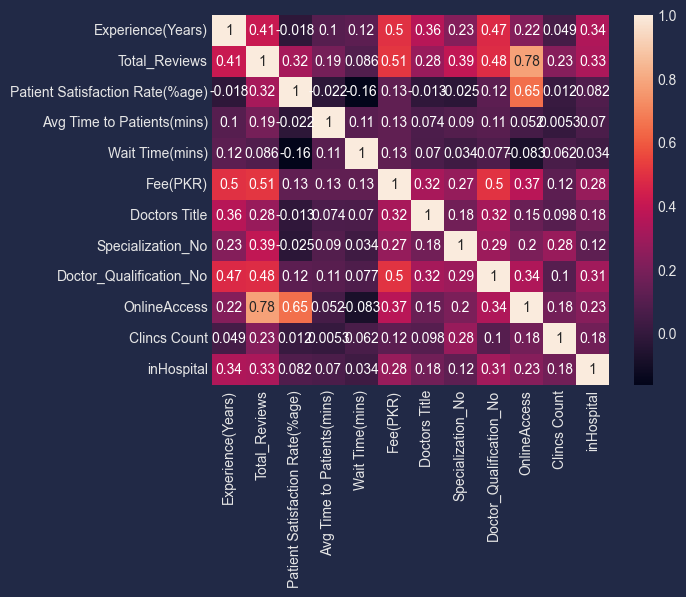

In [53]:
sns.heatmap(new_df.corr(method='spearman'),annot=True)

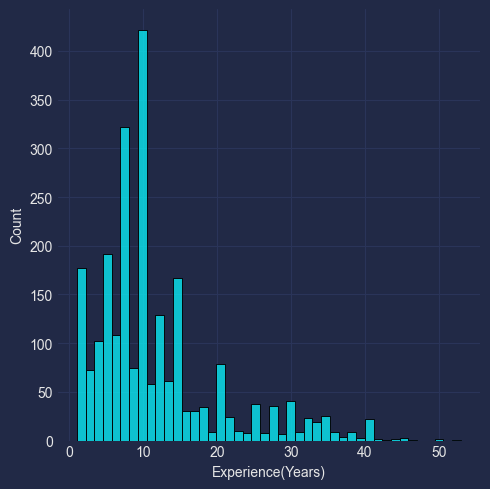

In [55]:
sns.displot(data=new_df,x="Experience(Years)")

In [56]:
new_df

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),Doctors Title,Specialization_No,Doctor_Qualification_No,OnlineAccess,Clincs Count,inHospital
0,Dr. Umair Hafeez,GUJRANWALA,ent specialist,"mbbs,fcps{otorhinolaryngologicent}",6.0,11,100,19,6,"centralhospital,jinnahcolony,gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000,1,1,2,1,1.0,1
1,Dr. Haris Shakeel,RAJAN-PUR,general physician,mbbs,1.0,0,94,14,11,noaddressavailable,nolinkavailable,500,1,1,1,0,1.0,0
2,Dr. Iqra Rehman,MIRPUR-KHAS,general physician,"mbbs,rmp,cfp{usa},certifiedincovid19+",6.0,9,100,10,0,"rehmanclinic,tandoadamnaka,mirpurkhas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000,1,1,4,1,1.0,1
3,Dr. Erum Memon,HYDERABAD,gynecologist,"mbbs,fcps{gynae&obstetrics}",11.0,71,96,18,10,"mehmoodhospital,qasimabad,hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800,1,1,2,1,1.0,1
4,Dr. Aisha Ahmad,LAHORE,dermatologist,"mbbs,fcps{dermatology},certified{aestheticmedi...",12.0,199,100,16,2,"skinnovation,johartown,lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500,1,1,3,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Dr. Amna Rizwan,LAHORE,"eye specialist,eye surgeon","mbbs,fcps{vitreo-retina}",10.0,11,100,14,11,"wahdatclinic,wahdatroad,lahore",https://www.marham.pk/doctors/lahore/eye-speci...,1000,1,2,2,1,1.0,1
2369,Dr. Misbah Fatima,OKARA,pediatrician,"mbbs,fcps{pediatrics}",10.0,7,100,14,11,"zayyankidneyandchildcareclinic,okara,okara",https://www.marham.pk/doctors/okara/pediatrici...,1000,1,1,2,1,1.0,1
2370,Dr. Muhammad Kashif,RAHIM-YAR-KHAN,dermatologist,"mbbs,fellowamericanaestheticassociation.",10.0,103,95,15,12,"moosaskin&laserclinic,punjab,rahimyarkhan",https://www.marham.pk/doctors/sadiqabad/dermat...,1000,1,1,2,1,2.0,1
2371,Asst. Prof. Dr. Ahmed Ayyaz,SAHIWAL,nephrologist,"mbbs,md{nephrology}",12.0,23,100,14,12,"sahiwalinternationalhospital,neargeneralbussta...",https://www.marham.pk/doctors/sahiwal/nephrolo...,1500,2,1,2,1,1.0,1


In [57]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [58]:
X.columns

Index(['Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Doctors Title',
       'Specialization_No', 'Doctor_Qualification_No', 'OnlineAccess',
       'Clincs Count', 'inHospital'],
      dtype='object')

In [59]:
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
mean_squared_error(y_test,pred)**(1/2)
# model.score(X_test,y_test)


631.7339834415826

In [60]:
new_df.loc[:,"Experience(Years)"]

0        6.0
1        1.0
2        6.0
3       11.0
4       12.0
        ... 
2368    10.0
2369    10.0
2370    10.0
2371    12.0
2372     8.0
Name: Experience(Years), Length: 2373, dtype: float64

In [61]:
for col in new_df.columns:
    if (new_df[col].dtype != np.float64) & (new_df[col].dtype != np.int64):
        continue
    q1 = new_df[col].quantile(0.25)
    q2 = new_df[col].quantile(0.75)
    max_limit = q2 + (1.5 * (q2-q1))
    min_limit = q1 - (1.5 * (q2-q1))
    print(f"Column {col}:",((new_df[col]>max_limit).sum()+(new_df[col]<min_limit).sum())/new_df.shape[0])
    print(f"Column {col}:",((new_df[col]>max_limit).sum()+(new_df[col]<min_limit).sum()))
    print(f"Column {col} max limit:",max_limit)

Column Experience(Years): 0.09186683522966708
Column Experience(Years): 218
Column Experience(Years) max limit: 26.0
Column Total_Reviews: 0.14664981036662453
Column Total_Reviews: 348
Column Total_Reviews max limit: 132.5
Column Patient Satisfaction Rate(%age): 0.016013485040033713
Column Patient Satisfaction Rate(%age): 38
Column Patient Satisfaction Rate(%age) max limit: 109.0
Column Avg Time to Patients(mins): 0.24568057311420144
Column Avg Time to Patients(mins): 583
Column Avg Time to Patients(mins) max limit: 16.5
Column Wait Time(mins): 0.3611462284028656
Column Wait Time(mins): 857
Column Wait Time(mins) max limit: 12.5
Column Fee(PKR): 0.05141171512852929
Column Fee(PKR): 122
Column Fee(PKR) max limit: 2850.0
Column Doctors Title: 0.1997471554993679
Column Doctors Title: 474
Column Doctors Title max limit: 1.0
Column Specialization_No: 0.1167298777918247
Column Specialization_No: 277
Column Specialization_No max limit: 1.0
Column Doctor_Qualification_No: 0.04382638010956595
C

In [62]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2373 non-null   object 
 1   City                             2373 non-null   object 
 2   Specialization                   2373 non-null   object 
 3   Doctor Qualification             2373 non-null   object 
 4   Experience(Years)                2373 non-null   float64
 5   Total_Reviews                    2373 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2373 non-null   int64  
 7   Avg Time to Patients(mins)       2373 non-null   int64  
 8   Wait Time(mins)                  2373 non-null   int64  
 9   Hospital Address                 2373 non-null   object 
 10  Doctors Link                     2373 non-null   object 
 11  Fee(PKR)                         2373 non-null   int64  
 12  Doctors Title       

In [63]:
X.keys()

Index(['Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Doctors Title',
       'Specialization_No', 'Doctor_Qualification_No', 'OnlineAccess',
       'Clincs Count', 'inHospital'],
      dtype='object')

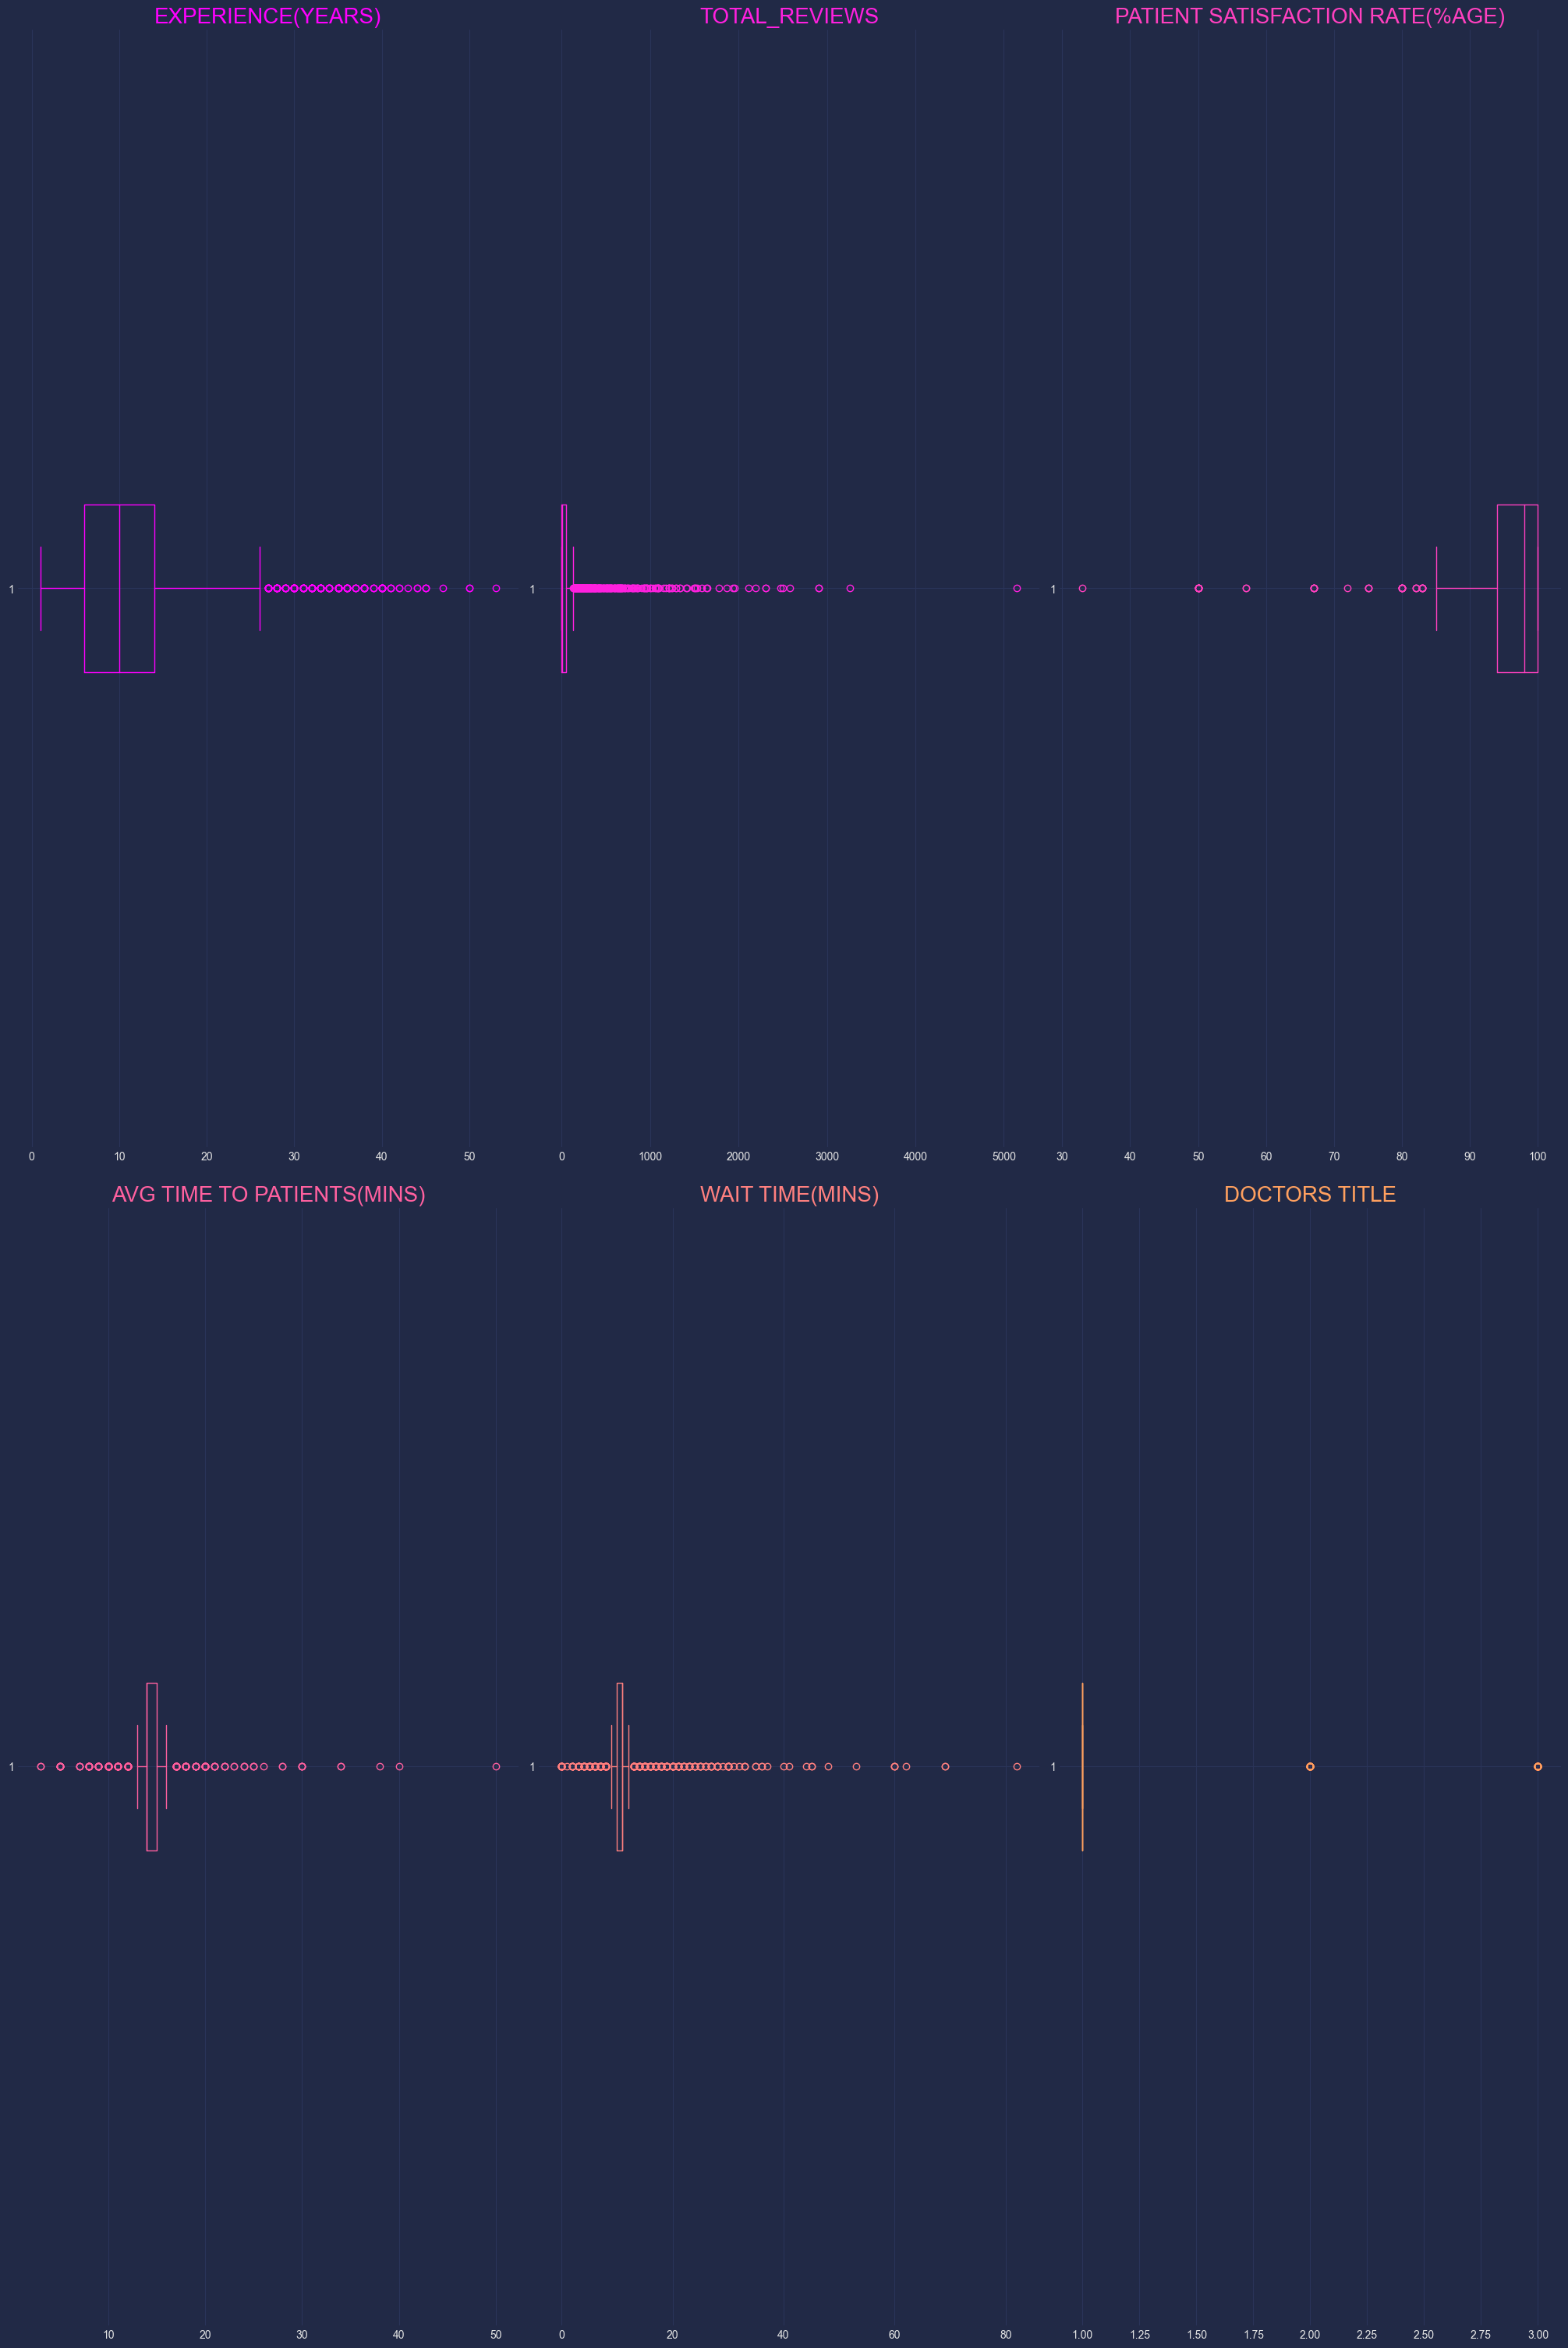

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score 
import mplcyberpunk
from matplotlib import cm
from matplotlib.patches import Circle
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.patheffects as pe
from sklearn.impute import KNNImputer
plt.style.use("cyberpunk")
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")
colormap_sect = np.linspace(0, 1, 9)
colors = [cm.spring(x) for x in colormap_sect]
figure, (axis) = plt.subplots(2, 3,figsize=(20,30),constrained_layout = True)
for column,ax,color in zip(X.keys(),axis.ravel(),colors):
    ax.boxplot(X[column].dropna(), vert=False,boxprops=dict( color=color),
            capprops=dict(color=color),
            whiskerprops=dict(color=color),
            flierprops=dict(color=color, markeredgecolor=color),
            medianprops=dict(color=color))
    ax.set_title(f"{column.upper()}",size=20,color=color)


(0.0, 1.0, 0.0, 1.0)

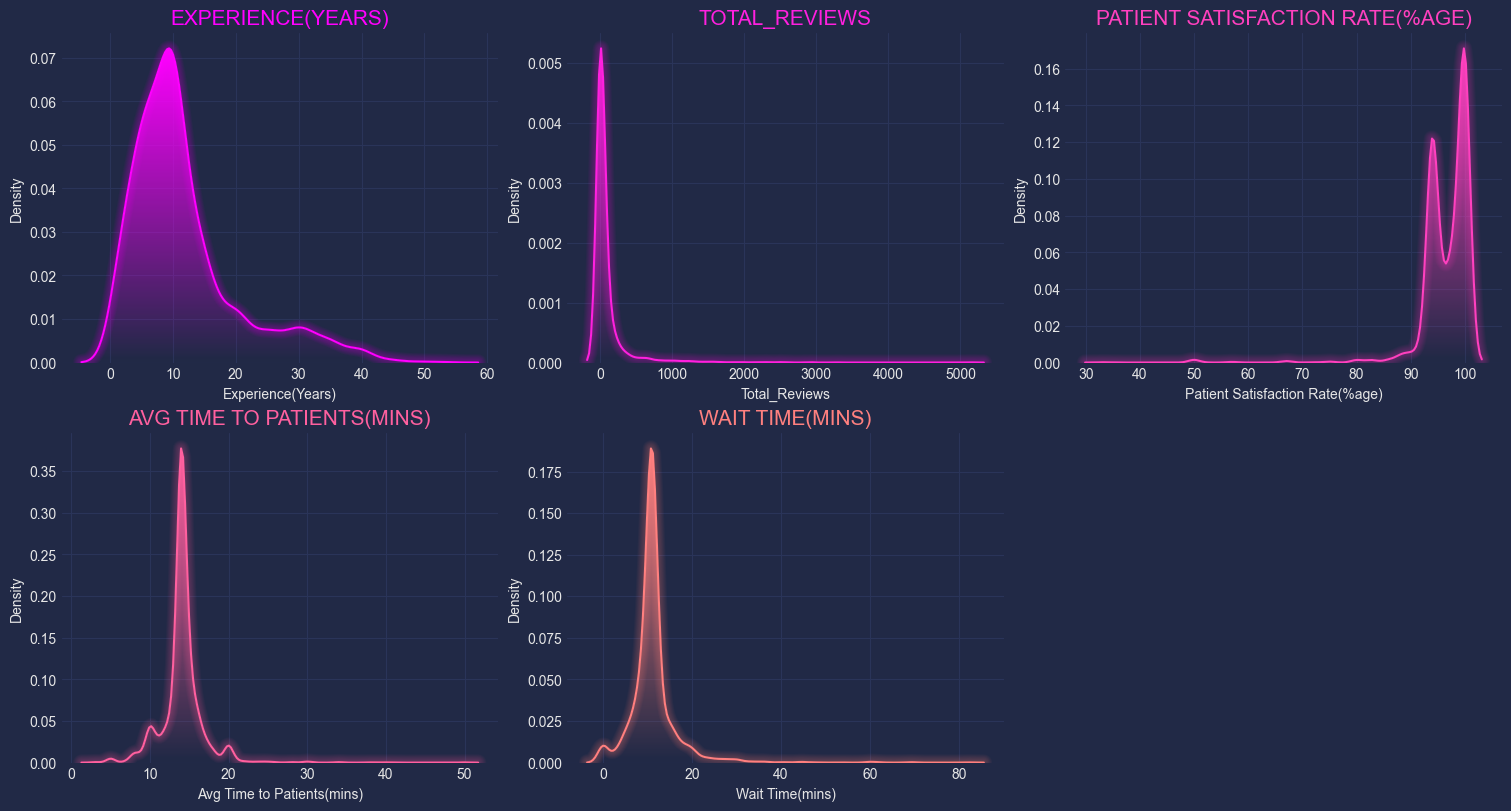

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score 
import mplcyberpunk
from matplotlib import cm
from matplotlib.patches import Circle
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.patheffects as pe
from sklearn.impute import KNNImputer
plt.style.use("cyberpunk")
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")
colormap_sect = np.linspace(0, 1, 9)
colors = [cm.spring(x) for x in colormap_sect]
figure, (axis) = plt.subplots(2, 3,figsize=(15,8),constrained_layout = True)
for column,ax,color in zip(X.keys(),axis.ravel(),colors):
    sns.kdeplot(X[column].dropna(), color=color,ax=ax)
    ax.set_title(f"{column.upper()}",size=15,color=color)
    mplcyberpunk.add_glow_effects(ax,gradient_fill=True)


axis[1][2].cla()
axis[1][2].axis("off")

(0.0, 1.0, 0.0, 1.0)

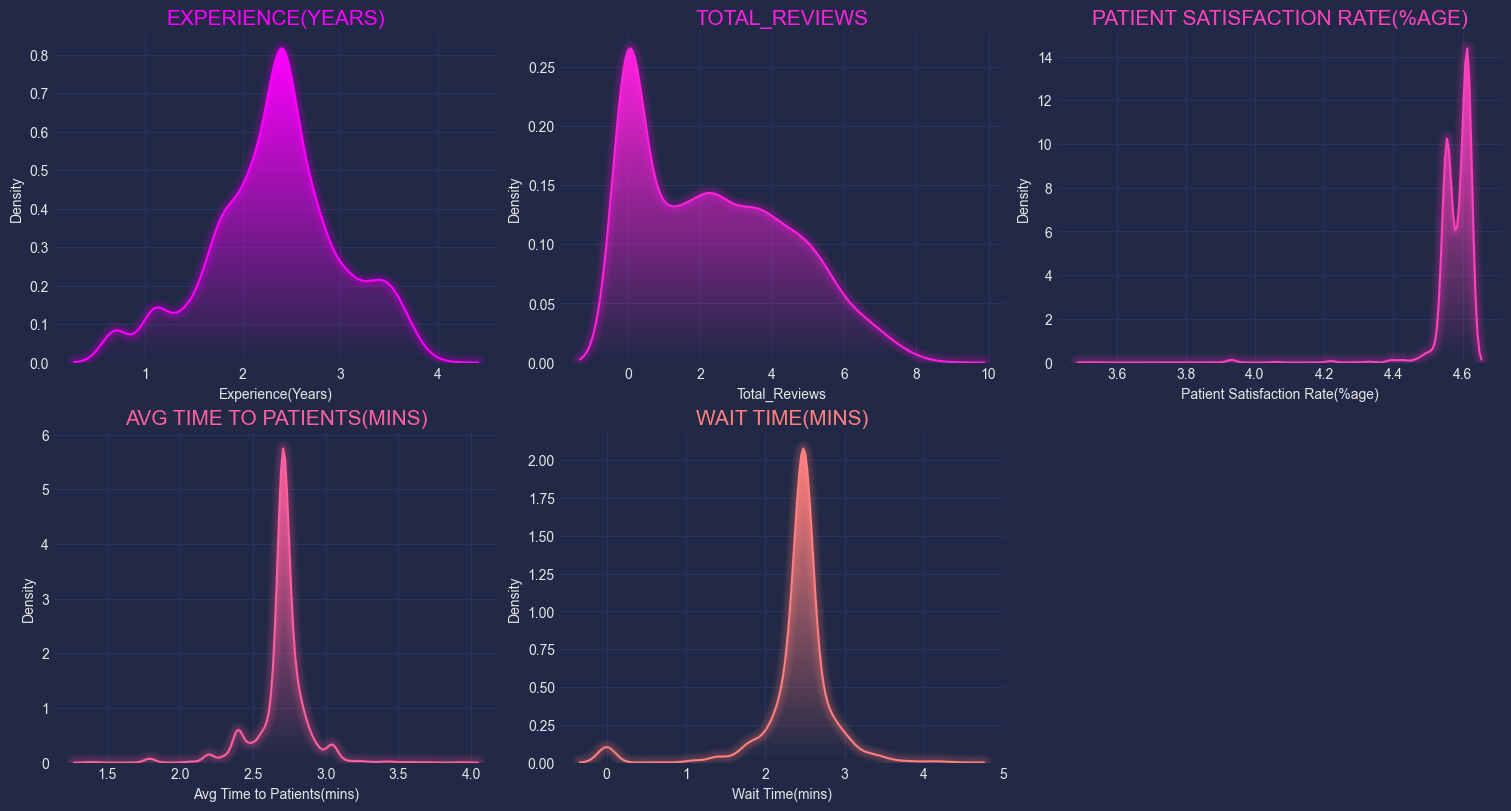

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score 
import mplcyberpunk
from matplotlib import cm
from matplotlib.patches import Circle
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.patheffects as pe
from sklearn.impute import KNNImputer
plt.style.use("cyberpunk")
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")
colormap_sect = np.linspace(0, 1, 9)
colors = [cm.spring(x) for x in colormap_sect]
figure, (axis) = plt.subplots(2, 3,figsize=(15,8),constrained_layout = True)
for column,ax,color in zip(X.keys(),axis.ravel(),colors):
    sns.kdeplot(np.log(X[column].dropna()+1), color=color,ax=ax)
    ax.set_title(f"{column.upper()}",size=15,color=color)
    mplcyberpunk.add_glow_effects(ax,gradient_fill=True)


axis[1][2].cla()
axis[1][2].axis("off")

(0.0, 1.0, 0.0, 1.0)

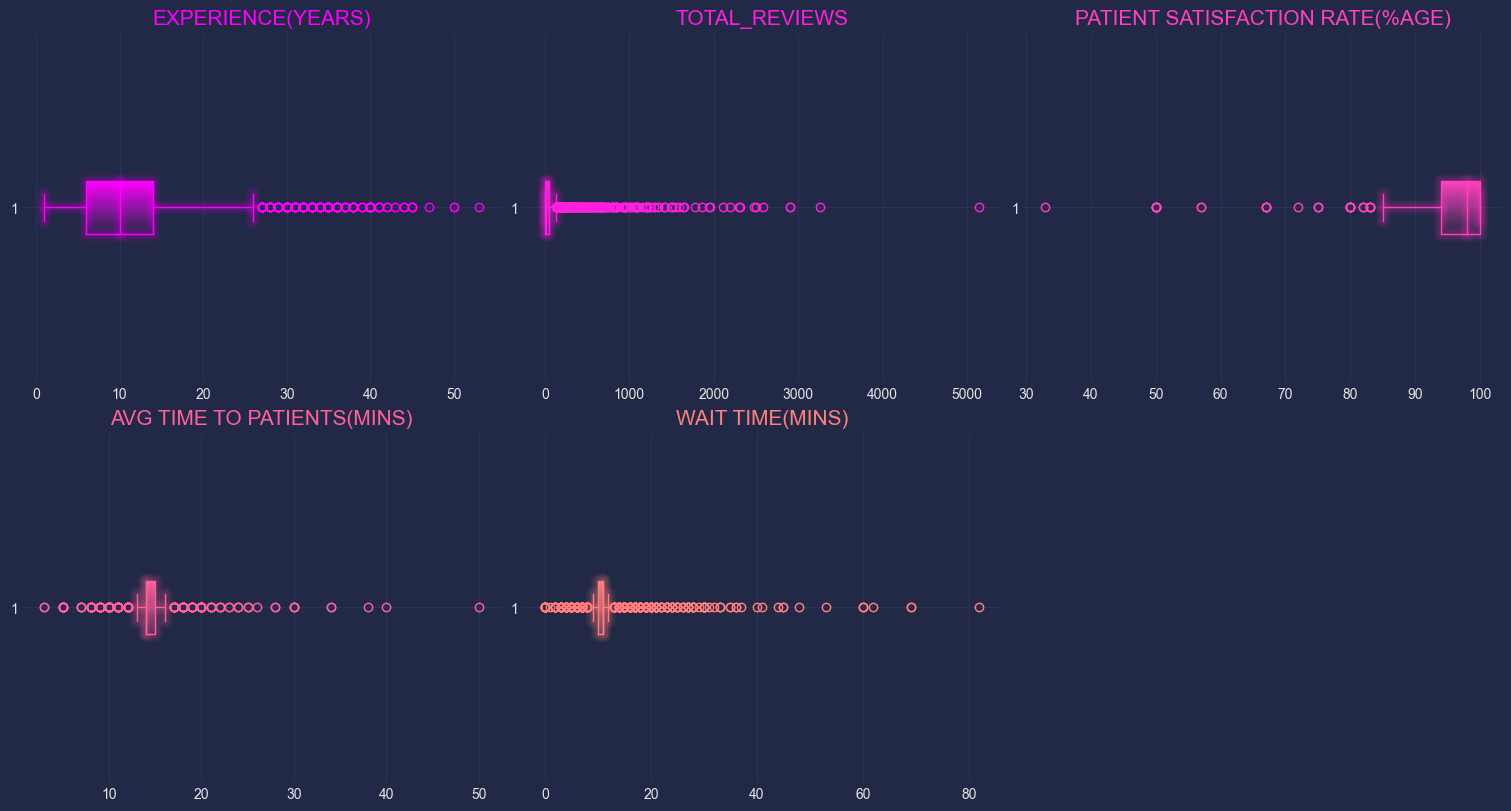

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score 
import mplcyberpunk
from matplotlib import cm
from matplotlib.patches import Circle
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.patheffects as pe
from sklearn.impute import KNNImputer
plt.style.use("cyberpunk")
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")
colormap_sect = np.linspace(0, 1, 9)
colors = [cm.spring(x) for x in colormap_sect]
figure, (axis) = plt.subplots(2, 3,figsize=(15,8),constrained_layout = True)
for column,ax,color in zip(X.keys(),axis.ravel(),colors):
    ax.boxplot(X[column].dropna(), vert=False,boxprops=dict( color=color),
            capprops=dict(color=color),
            whiskerprops=dict(color=color),
            flierprops=dict(color=color, markeredgecolor=color),
            medianprops=dict(color=color))
    
    ax.set_title(f"{column.upper()}",size=15,color=color)
    mplcyberpunk.add_glow_effects(ax,gradient_fill=True)


axis[1][2].cla()
axis[1][2].axis("off")

In [67]:
new_df.columns

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Hospital Address',
       'Doctors Link', 'Fee(PKR)', 'Doctors Title', 'Specialization_No',
       'Doctor_Qualification_No', 'OnlineAccess', 'Clincs Count',
       'inHospital'],
      dtype='object')

In [68]:
def join_special(word_list:list):
    
    for i,word in enumerate(word_list):
        word_list[i]=str(word_list[i]).strip()
        word_list[i]=Nospace.join(word_list[i])

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)

        if word_list[i]=="" or word_list[i]==" ":
            found=True
            
            word_list.remove(word_list[i])
            continue
            
        if word_list[i] in Specialization:
            Specialization[word_list[i]]+=1
        else:
            Specialization[word_list[i]]=1
    
    
    

    return QualSeprator.join(word_list[:])

In [69]:
specs=list(Specialization.keys())

In [70]:
new_df.Specialization

0                   ent specialist
1                general physician
2                general physician
3                     gynecologist
4                    dermatologist
                   ...            
2368    eye specialist,eye surgeon
2369                  pediatrician
2370                 dermatologist
2371                  nephrologist
2372                  nephrologist
Name: Specialization, Length: 2373, dtype: object

In [71]:
for spec in specs:
    new_df[f"{spec}"]= np.where(new_df.Specialization.str.contains(spec,case=False),1,0)

In [72]:
Qual_freq['*']

1

In [73]:
quals=list(Qual_freq.keys())
for qual in quals:
    if qual == '*':
        continue
    new_df[f"{qual}"]= np.where(new_df["Doctor Qualification"].str.contains(qual,case=False),1,0)

In [74]:
new_df

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,...,dffp{uk},fcps{obstetrics&gynecologic},diplomain{dermatology&dermatosurgery},frcp{glasgow,frcp{ireland},mbbs{distinctionholderkmc},mbbsmsorthopedics/pgrorthopedics,mcpsdermatologist,ms{infertility&reproductivemedicine},fcps{vitreo-retina}
0,Dr. Umair Hafeez,GUJRANWALA,ent specialist,"mbbs,fcps{otorhinolaryngologicent}",6.0,11,100,19,6,"centralhospital,jinnahcolony,gujranwala",...,0,0,0,0,0,0,0,0,0,0
1,Dr. Haris Shakeel,RAJAN-PUR,general physician,mbbs,1.0,0,94,14,11,noaddressavailable,...,0,0,0,0,0,0,0,0,0,0
2,Dr. Iqra Rehman,MIRPUR-KHAS,general physician,"mbbs,rmp,cfp{usa},certifiedincovid19+",6.0,9,100,10,0,"rehmanclinic,tandoadamnaka,mirpurkhas",...,0,0,0,0,0,0,0,0,0,0
3,Dr. Erum Memon,HYDERABAD,gynecologist,"mbbs,fcps{gynae&obstetrics}",11.0,71,96,18,10,"mehmoodhospital,qasimabad,hyderabad",...,0,0,0,0,0,0,0,0,0,0
4,Dr. Aisha Ahmad,LAHORE,dermatologist,"mbbs,fcps{dermatology},certified{aestheticmedi...",12.0,199,100,16,2,"skinnovation,johartown,lahore",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Dr. Amna Rizwan,LAHORE,"eye specialist,eye surgeon","mbbs,fcps{vitreo-retina}",10.0,11,100,14,11,"wahdatclinic,wahdatroad,lahore",...,0,0,0,0,0,0,0,0,0,1
2369,Dr. Misbah Fatima,OKARA,pediatrician,"mbbs,fcps{pediatrics}",10.0,7,100,14,11,"zayyankidneyandchildcareclinic,okara,okara",...,0,0,0,0,0,0,0,0,0,0
2370,Dr. Muhammad Kashif,RAHIM-YAR-KHAN,dermatologist,"mbbs,fellowamericanaestheticassociation.",10.0,103,95,15,12,"moosaskin&laserclinic,punjab,rahimyarkhan",...,0,0,0,0,0,0,0,0,0,0
2371,Asst. Prof. Dr. Ahmed Ayyaz,SAHIWAL,nephrologist,"mbbs,md{nephrology}",12.0,23,100,14,12,"sahiwalinternationalhospital,neargeneralbussta...",...,0,0,0,0,0,0,0,0,0,0


In [75]:
new_df.sum()

Doctor Name                             Dr. Umair HafeezDr. Haris ShakeelDr. Iqra Rehm...
City                                    GUJRANWALARAJAN-PURMIRPUR-KHASHYDERABADLAHOREI...
Specialization                          ent specialistgeneral physiciangeneral physici...
Doctor Qualification                    mbbs,fcps{otorhinolaryngologicent}mbbsmbbs,rmp...
Experience(Years)                                                                 27986.5
                                                              ...                        
mbbs{distinctionholderkmc}                                                              1
mbbsmsorthopedics/pgrorthopedics                                                        1
mcpsdermatologist                                                                       1
ms{infertility&reproductivemedicine}                                                    1
fcps{vitreo-retina}                                                                     1
Length: 11

In [76]:
df["Doctor Qualification"].str.replace('(','{').str.replace(')',"}")

0               MBBS , FCPS { Otorhinolaryngologic ENT } 
1                                                    MBBS
2           MBBS, RMP, CFP {USA}, Certified in Covid 19 +
3                         MBBS, FCPS {Gynae & Obstetrics}
4       MBBS, FCPS {Dermatology}, Certified {Aesthetic...
                              ...                        
2381                           MBBS, FCPS {VITREO-RETINA}
2382                              MBBS, FCPS {Pediatrics}
2383         MBBS, Fellow American Aesthetic Association.
2384                                MBBS, MD {Nephrology}
2385                              MBBS, FCPS {Nephrology}
Name: Doctor Qualification, Length: 2386, dtype: object

# EDA

In [77]:
new_df.columns[:20]

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Hospital Address',
       'Doctors Link', 'Fee(PKR)', 'Doctors Title', 'Specialization_No',
       'Doctor_Qualification_No', 'OnlineAccess', 'Clincs Count', 'inHospital',
       'ent specialist', 'general physician'],
      dtype='object')

In [78]:
EDA_df=new_df.loc[:,:"inHospital"]

In [79]:
rev_doctors_rank = {3: 'Prof',  2:'Assoc',  2:'Asst', 1:'Dr'}

In [80]:
EDA_df["Doctors Title"]=EDA_df["Doctors Title"].map(rev_doctors_rank)

In [81]:
EDA_df.City=EDA_df.City.str.capitalize()

In [82]:
EDA_df.City.value_counts()

Lahore                 151
Karachi                150
Islamabad              146
Peshawar               134
Multan                 126
                      ... 
Tando-muhammad-khan      1
Kashmor                  1
Dinga                    1
Samundri                 1
Pattoki                  1
Name: City, Length: 117, dtype: int64

In [83]:
EDA_df

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),Doctors Title,Specialization_No,Doctor_Qualification_No,OnlineAccess,Clincs Count,inHospital
0,Dr. Umair Hafeez,Gujranwala,ent specialist,"mbbs,fcps{otorhinolaryngologicent}",6.0,11,100,19,6,"centralhospital,jinnahcolony,gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000,Dr,1,2,1,1.0,1
1,Dr. Haris Shakeel,Rajan-pur,general physician,mbbs,1.0,0,94,14,11,noaddressavailable,nolinkavailable,500,Dr,1,1,0,1.0,0
2,Dr. Iqra Rehman,Mirpur-khas,general physician,"mbbs,rmp,cfp{usa},certifiedincovid19+",6.0,9,100,10,0,"rehmanclinic,tandoadamnaka,mirpurkhas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000,Dr,1,4,1,1.0,1
3,Dr. Erum Memon,Hyderabad,gynecologist,"mbbs,fcps{gynae&obstetrics}",11.0,71,96,18,10,"mehmoodhospital,qasimabad,hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800,Dr,1,2,1,1.0,1
4,Dr. Aisha Ahmad,Lahore,dermatologist,"mbbs,fcps{dermatology},certified{aestheticmedi...",12.0,199,100,16,2,"skinnovation,johartown,lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500,Dr,1,3,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Dr. Amna Rizwan,Lahore,"eye specialist,eye surgeon","mbbs,fcps{vitreo-retina}",10.0,11,100,14,11,"wahdatclinic,wahdatroad,lahore",https://www.marham.pk/doctors/lahore/eye-speci...,1000,Dr,2,2,1,1.0,1
2369,Dr. Misbah Fatima,Okara,pediatrician,"mbbs,fcps{pediatrics}",10.0,7,100,14,11,"zayyankidneyandchildcareclinic,okara,okara",https://www.marham.pk/doctors/okara/pediatrici...,1000,Dr,1,2,1,1.0,1
2370,Dr. Muhammad Kashif,Rahim-yar-khan,dermatologist,"mbbs,fellowamericanaestheticassociation.",10.0,103,95,15,12,"moosaskin&laserclinic,punjab,rahimyarkhan",https://www.marham.pk/doctors/sadiqabad/dermat...,1000,Dr,1,2,1,2.0,1
2371,Asst. Prof. Dr. Ahmed Ayyaz,Sahiwal,nephrologist,"mbbs,md{nephrology}",12.0,23,100,14,12,"sahiwalinternationalhospital,neargeneralbussta...",https://www.marham.pk/doctors/sahiwal/nephrolo...,1500,Asst,1,2,1,1.0,1


In [84]:
new_df.loc[:,:"inHospital"]

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR),Doctors Title,Specialization_No,Doctor_Qualification_No,OnlineAccess,Clincs Count,inHospital
0,Dr. Umair Hafeez,GUJRANWALA,ent specialist,"mbbs,fcps{otorhinolaryngologicent}",6.0,11,100,19,6,"centralhospital,jinnahcolony,gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000,1,1,2,1,1.0,1
1,Dr. Haris Shakeel,RAJAN-PUR,general physician,mbbs,1.0,0,94,14,11,noaddressavailable,nolinkavailable,500,1,1,1,0,1.0,0
2,Dr. Iqra Rehman,MIRPUR-KHAS,general physician,"mbbs,rmp,cfp{usa},certifiedincovid19+",6.0,9,100,10,0,"rehmanclinic,tandoadamnaka,mirpurkhas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000,1,1,4,1,1.0,1
3,Dr. Erum Memon,HYDERABAD,gynecologist,"mbbs,fcps{gynae&obstetrics}",11.0,71,96,18,10,"mehmoodhospital,qasimabad,hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800,1,1,2,1,1.0,1
4,Dr. Aisha Ahmad,LAHORE,dermatologist,"mbbs,fcps{dermatology},certified{aestheticmedi...",12.0,199,100,16,2,"skinnovation,johartown,lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500,1,1,3,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Dr. Amna Rizwan,LAHORE,"eye specialist,eye surgeon","mbbs,fcps{vitreo-retina}",10.0,11,100,14,11,"wahdatclinic,wahdatroad,lahore",https://www.marham.pk/doctors/lahore/eye-speci...,1000,1,2,2,1,1.0,1
2369,Dr. Misbah Fatima,OKARA,pediatrician,"mbbs,fcps{pediatrics}",10.0,7,100,14,11,"zayyankidneyandchildcareclinic,okara,okara",https://www.marham.pk/doctors/okara/pediatrici...,1000,1,1,2,1,1.0,1
2370,Dr. Muhammad Kashif,RAHIM-YAR-KHAN,dermatologist,"mbbs,fellowamericanaestheticassociation.",10.0,103,95,15,12,"moosaskin&laserclinic,punjab,rahimyarkhan",https://www.marham.pk/doctors/sadiqabad/dermat...,1000,1,1,2,1,2.0,1
2371,Asst. Prof. Dr. Ahmed Ayyaz,SAHIWAL,nephrologist,"mbbs,md{nephrology}",12.0,23,100,14,12,"sahiwalinternationalhospital,neargeneralbussta...",https://www.marham.pk/doctors/sahiwal/nephrolo...,1500,2,1,2,1,1.0,1


In [85]:



def ExtractFreq(word_list:list,freq_dict:dict):
    
    for i,word in enumerate(word_list):
        word_list[i]=str(word_list[i]).strip()
        word_list[i]=Nospace.join(word_list[i])

        ## There are some words that can not be handled
        ## ['M.B.B.S', 'F.C.P.S', '(NeuroSurgery)I.T.F(UnitedKingdom)'] => ['MBBS',"FCPS"]
        ## We guess that this can be a good technique to handle different text problems

        # if "." in word_list[i]:
        #     print(word_list[i])
        #     print(word_list)

        if word_list[i]=="" or word_list[i]==" ":
            found=True
            
            word_list.remove(word_list[i])
            continue
            
        if word_list[i] in freq_dict:
            freq_dict[word_list[i]]+=1
        else:
            freq_dict[word_list[i]]=1

In [86]:
new_df["OnlineAccess"].value_counts(normalize=True)

1    0.728192
0    0.271808
Name: OnlineAccess, dtype: float64

In [87]:
# figure, (axis) = plt.subplots(1, 1,figsize=(5,5),constrained_layout = True)
# axis.pie([(new_df["OnlineAccess"].count()-(new_df["OnlineAccess"]==1).sum()),(new_df["OnlineAccess"]==1).sum()], labels = ['No Online','Online'], autopct='%.0f%%',shadow=True,textprops={'fontsize': 12,'color':'w'})
# circle=Circle(xy=(0,0),radius=0.75,facecolor='#212946')
# axis.add_patch(circle)
# txt = figure.suptitle("Book Online",
#               size=30,
#               color='#00FFEF',
#               path_effects=[pe.withStroke(linewidth=3, foreground='#FF00DE')])

In [88]:
new_df["Specialization_No"].value_counts().reset_index()

,index,Specialization_No
0,1,2096
1,2,133
2,3,111
3,4,25
4,5,8


In [89]:
len(Specialization)

62

In [90]:
docsDf

,Doctor Name,Doctor Qualification,Specialization,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),0
0,Asst. Prof. Dr. Mujahid Israr,"mbbs,fcps{gastroenterology},fcps{internalmedic...","gastroenterologist,liver specialist,general ph...",15.0,1215,98,4
1,Asst. Prof. Dr. Mubeen Ahmed Memon,"mbbs,fcps{pulmonology}",pulmonologist / lung specialist,10.0,47,98,3
2,Asst. Prof. Dr. Shoaib Manzoor,"mbbs,fcps",nephrologist,11.0,6,100,3
3,Dr. Mian Awais,"mbbs,mrcs{glasgow},fics{usa},facs{usa}.ms{neur...","neuro surgeon,spinal surgeon",10.0,193,94,3
4,Dr. Ammar Yasir,"mbbs,fcps{neurology}",neurologist,10.0,21,100,3
...,...,...,...,...,...,...,...
2239,Dr. Hafiz Fatim Jawad,mbbs,general physician,4.0,2,100,1
2240,Dr. Hafiz Bilal Rasool Ramay,"mbbs{k.e},mrcp{uk},fcps{nephrology},esce{nephr...","nephrologist,diabetologist,medical specialist",12.0,209,97,1
2241,Dr. Hafiz Atif Hayat Malik,"mbbs,fcps{orthopaedicsurgery}",orthopedic surgeon,6.0,2,100,1
2242,Dr. Hafiz Adnan Aslam,mbbs,general physician,6.0,0,94,1


In [91]:
docsDf
Dash_Qual_freq=dict()
Dash_Spec_freq=dict()
docsDf["Doctor Qualification"].str.split(",").apply(lambda x : ExtractFreq(x,Dash_Qual_freq))
docsDf["Specialization"].str.split(",").apply(lambda x : ExtractFreq(x,Dash_Spec_freq))

Qual_df=pd.DataFrame({"Qualification":Dash_Qual_freq.keys(),"count":list(Dash_Qual_freq.values())})
Qual_df.Qualification=Qual_df.Qualification.str.capitalize()
Top5Qual=Qual_df.sort_values(by="count")[-8:-2]

Spec_df=pd.DataFrame({"Specialization":Dash_Spec_freq.keys(),"count":list(Dash_Spec_freq.values())})
Spec_df.Specialization=Spec_df.Specialization.str.capitalize()
Top5Spec=Spec_df.sort_values(by="count")[-8:]

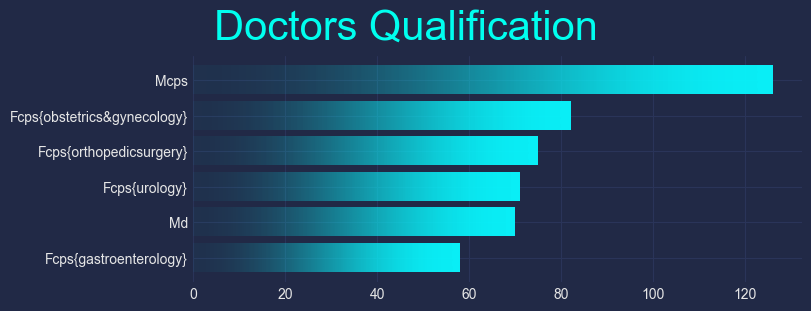

In [92]:
figure, (axis) = plt.subplots(1, 1,figsize=(8,3),constrained_layout = True)
pieData=new_df["Doctor_Qualification_No"].value_counts().reset_index()
bars=axis.barh(Top5Qual.iloc[:,0], 
          width= Top5Qual.iloc[:,1])
mplcyberpunk.add_bar_gradient(bars=bars,horizontal=True)
txt = figure.suptitle("Doctors Qualification",
              size=30,
              color='#00FFEF',
            )

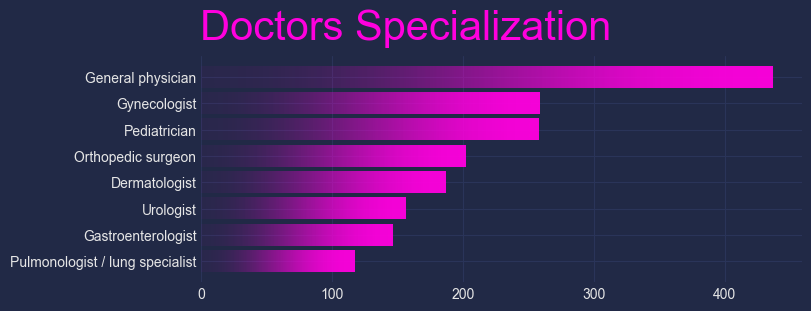

In [93]:
figure, (axis) = plt.subplots(1, 1,figsize=(8,3),constrained_layout = True)
pieData=new_df["Specialization_No"].value_counts().reset_index()
colors = ["C0", "C1", "C2", "C3", "C4"]
bars=axis.barh(Top5Spec.iloc[:,0], 
          width= Top5Spec.iloc[:,1],
           color="#FF00DE", zorder=2)
mplcyberpunk.add_bar_gradient(bars=bars,horizontal=True)
txt = figure.suptitle("Doctors Specialization",
              size=30,
              color='#FF00DE',
              )

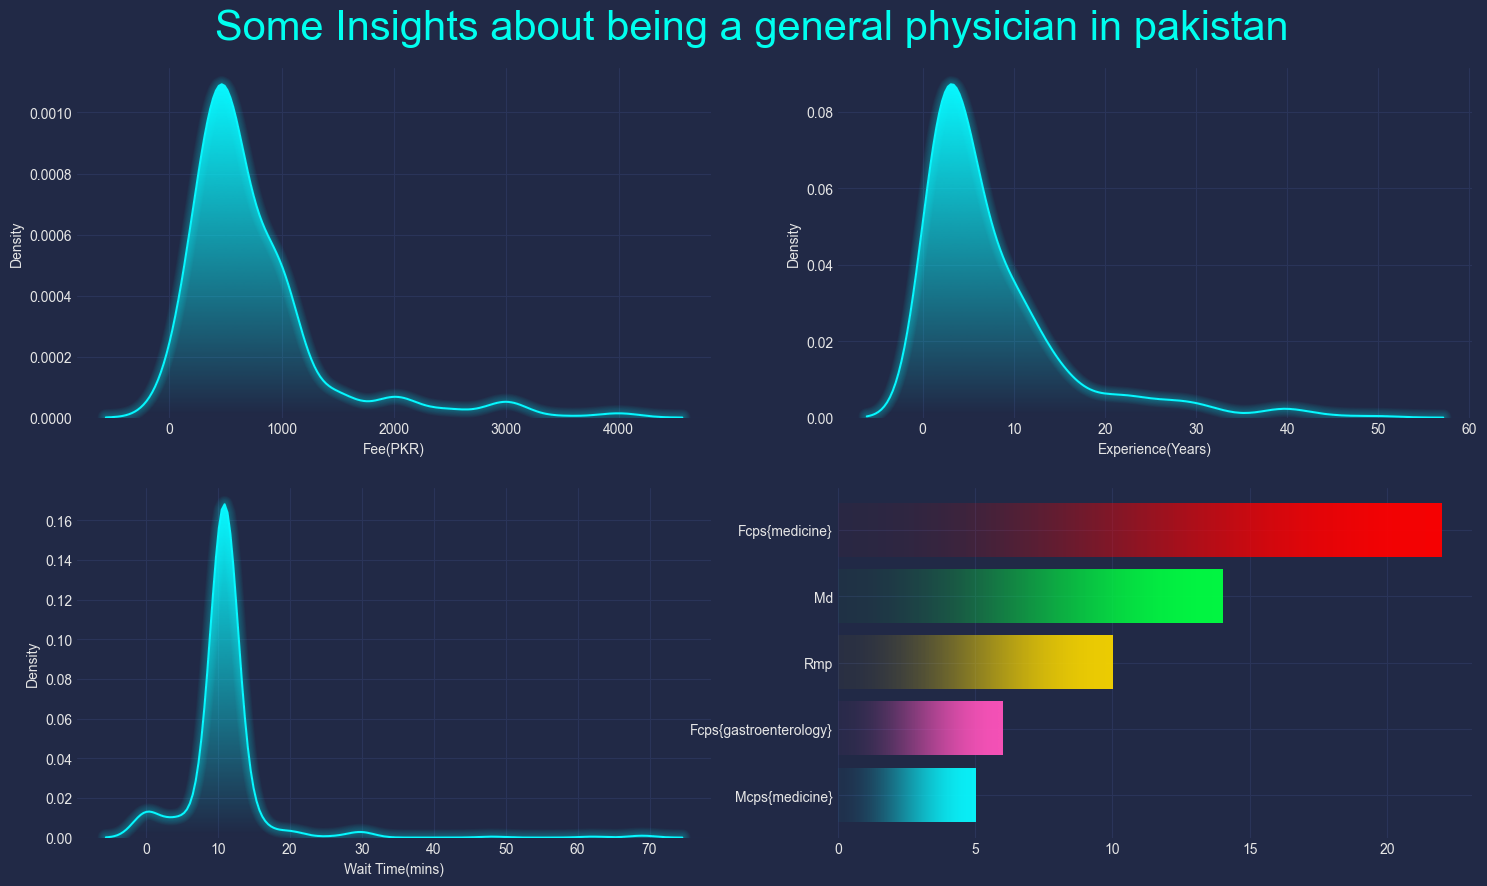

In [94]:
plt.style.use("cyberpunk")

Dash_Qual_freq=dict()
Dashboard_df= new_df[new_df["Specialization"].str.contains("general physician")]

Dashboard_df["Doctor Qualification"].str.split(",").apply(lambda x : ExtractFreq(x,Dash_Qual_freq))
Qual_df=pd.DataFrame({"Qualification":Dash_Qual_freq.keys(),"count":list(Dash_Qual_freq.values())})
Qual_df.Qualification=Qual_df.Qualification.str.capitalize()
Top5Qual=Qual_df.sort_values(by="count")[-7:-2]

figure, (axis) = plt.subplots(2, 2,figsize=(18,10))
sns.kdeplot(data=Dashboard_df,x="Fee(PKR)",ax=axis[0,0])
sns.kdeplot(data=Dashboard_df,x="Experience(Years)",ax=axis[0,1])
sns.kdeplot(data=Dashboard_df,x="Wait Time(mins)",ax=axis[1,0])
bars1=axis[1,1].barh(Top5Qual.Qualification,Top5Qual["count"],color= ["C0", "C1", "C2", "C3", "C4"])
mplcyberpunk.add_bar_gradient(bars=bars1,horizontal=True)
figure.suptitle(y=0.90,t="Some Insights about being a general physician in pakistan",horizontalalignment="center",
                verticalalignment="bottom",fontweight=20,
                size=30,
                color='#00FFEF',
                )
mplcyberpunk.add_glow_effects(axis[0,0],gradient_fill=True)
mplcyberpunk.add_glow_effects(axis[0,1],gradient_fill=True)
mplcyberpunk.add_glow_effects(axis[1,0],gradient_fill=True)
plt.show()

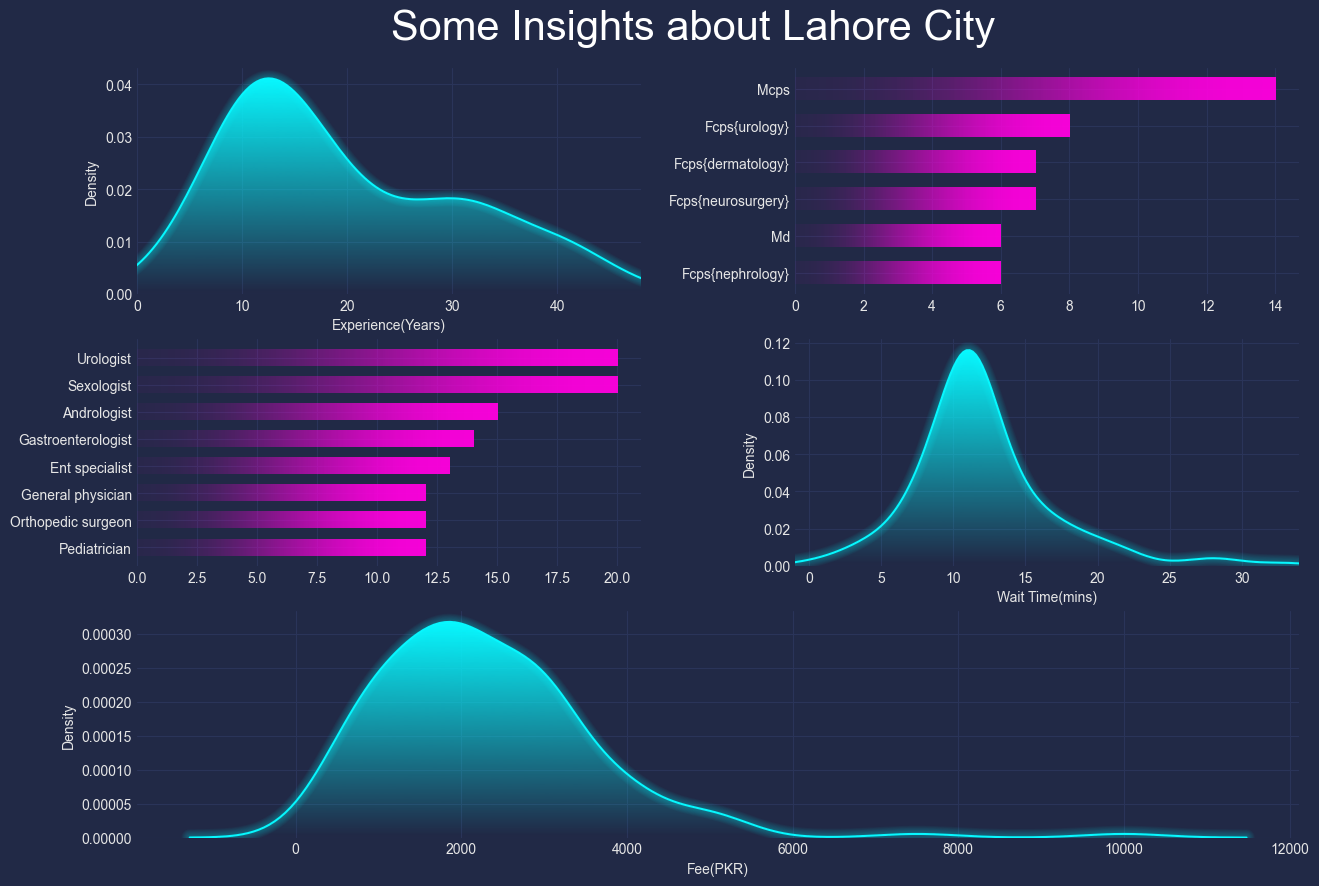

<BarContainer object of 6 artists>

In [95]:
Dash_Qual_freq=dict()
Dash_Spec_freq=dict()
Dashboard_df= new_df[new_df["City"].str.contains("LAHORE")]
Dashboard_df["Doctor Qualification"].str.split(",").apply(lambda x : ExtractFreq(x,Dash_Qual_freq))
Dashboard_df["Specialization"].str.split(",").apply(lambda x : ExtractFreq(x,Dash_Spec_freq))

Qual_df=pd.DataFrame({"Qualification":Dash_Qual_freq.keys(),"count":list(Dash_Qual_freq.values())})
Qual_df.Qualification=Qual_df.Qualification.str.capitalize()
Top5Qual=Qual_df.sort_values(by="count")[-8:-2]

Spec_df=pd.DataFrame({"Specialization":Dash_Spec_freq.keys(),"count":list(Dash_Spec_freq.values())})
Spec_df.Specialization=Spec_df.Specialization.str.capitalize()
Top5Spec=Spec_df.sort_values(by="count")[-8:]

fig=plt.figure(figsize=(15,10))

axd = fig.subplot_mosaic(
    """
    AAAA.BBBB
    DDDD.EEEE
    CCCCCCCCC
    """
)

sns.kdeplot(data=Dashboard_df,x="Experience(Years)",ax=axd["A"])
axd["A"].set_xlim(left=Dashboard_df["Experience(Years)"].min() - 1,  # Adjust as needed
                 right=Dashboard_df["Experience(Years)"].max() + 1)  # Adjust as needed

sns.kdeplot(data=Dashboard_df,x="Wait Time(mins)",ax=axd["E"])
axd["E"].set_xlim(left=Dashboard_df["Wait Time(mins)"].min() - 1,  # Adjust as needed
                 right=Dashboard_df["Wait Time(mins)"].max() + 1)  # Adjust as needed
sns.kdeplot(data=Dashboard_df,x="Fee(PKR)",ax=axd["C"])
bars1=axd["B"].barh(Top5Qual.Qualification,Top5Qual["count"],color= "#FF00DE",height=0.6)
bars2=axd["D"].barh(Top5Spec.Specialization,Top5Spec["count"],color= "#FF00DE",height=0.6)
fig.suptitle(y=0.90,t="Some Insights about Lahore City ",horizontalalignment="center",
verticalalignment="bottom",fontweight=20,
size=30,
              color='white',
             )
mplcyberpunk.add_glow_effects(axd["A"],gradient_fill=True)
mplcyberpunk.add_glow_effects(axd["E"],gradient_fill=True)
mplcyberpunk.add_glow_effects(axd["C"],gradient_fill=True)
mplcyberpunk.add_bar_gradient(ax=axd["B"],bars=bars1,horizontal=True)
mplcyberpunk.add_bar_gradient(ax=axd["D"],bars=bars2,horizontal=True)
plt.show()
bars1

In [96]:
new_df["City"].value_counts()[:10]

LAHORE        151
KARACHI       150
ISLAMABAD     146
PESHAWAR      134
MULTAN        126
QUETTA        122
FAISALABAD    115
HYDERABAD      95
GUJRANWALA     90
BAHAWALPUR     79
Name: City, dtype: int64

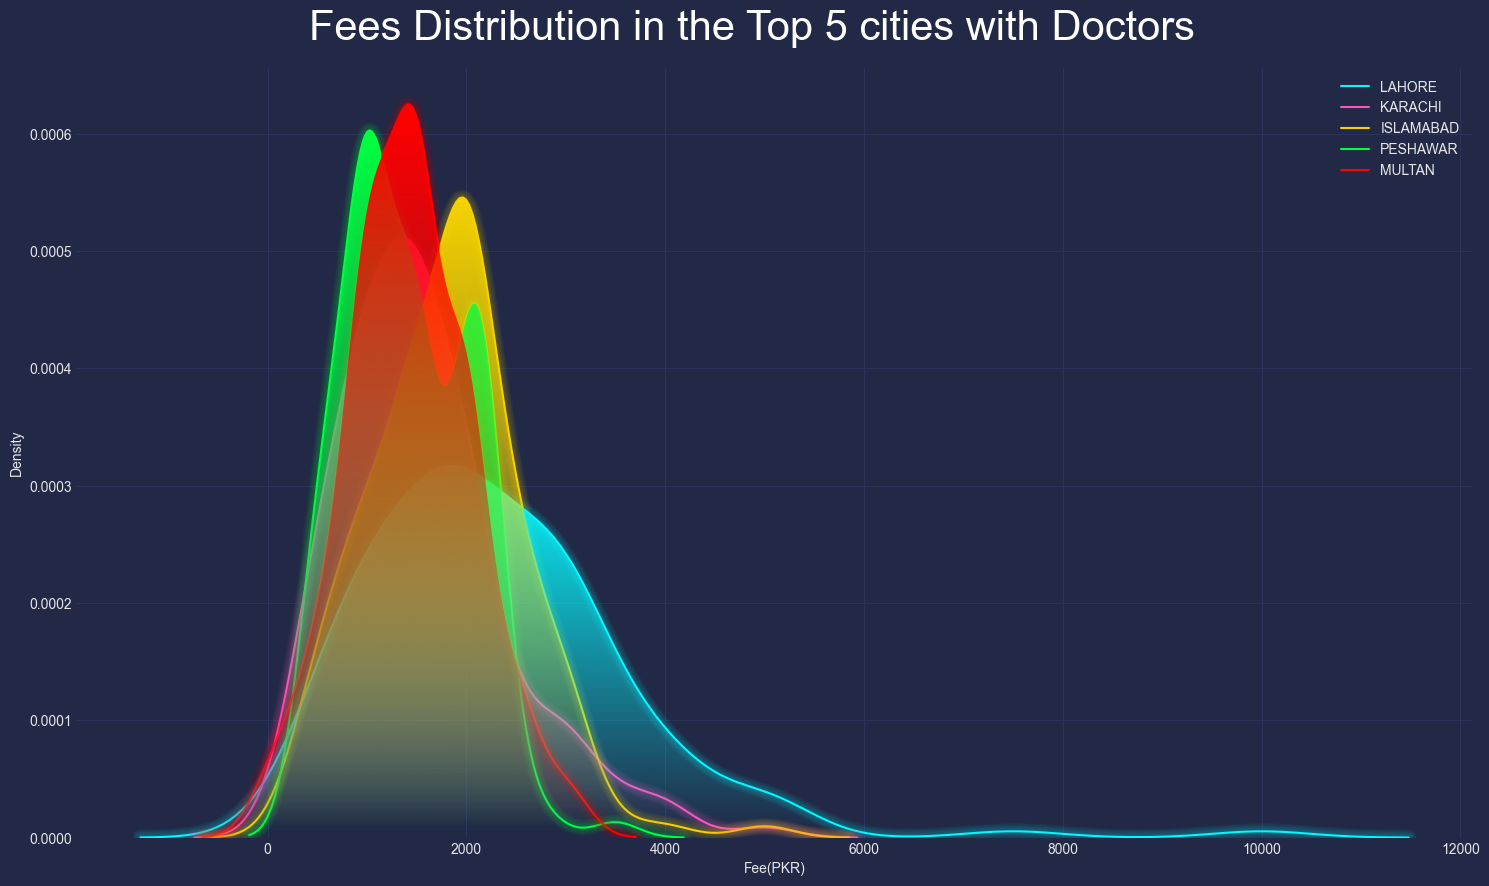

In [97]:
pp=new_df[new_df["City"].isin(new_df["City"].value_counts()[:5].index)]
figure, (axis) = plt.subplots(1, 1,figsize=(18,10))
for city in new_df["City"].value_counts()[:5].index:
    dashboard_df=pp[pp.City==city]
    sns.kdeplot(data=dashboard_df,x="Fee(PKR)",ax=axis,label=city)
    plt.legend()
mplcyberpunk.add_glow_effects(axis,gradient_fill=True)
figure.suptitle(y=0.90,t="Fees Distribution in the Top 5 cities with Doctors",horizontalalignment="center",
verticalalignment="bottom",fontweight=20,
size=30,
              color='white',
             )
plt.show()

In [98]:
# %matplotlib qt
# import ipywidgets as widgets
# # plt.style.use("default")
# output = widgets.Output()
 
# # create some x data
# x = np.linspace(0, 2 * np.pi, 100)
 
# # default line color
# initial_color = '#FF00DD'
 
# with output:
#     fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
     
# # move the toolbar to the bottom
# fig.canvas.toolbar_position = 'bottom'
# ax.grid(True)    
# line, = ax.plot(x, np.sin(x), initial_color)
# # create some control elements
# int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='freq')
# color_picker = widgets.ColorPicker(value=initial_color, description='pick a color')
# text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
# text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
# ComboBox = widgets.Select(
#     options=specs,
#     #value='',
#     # rows=10,
#     description='Specialization',
#     #disabled=False
# )
# # callback functions
# def update(change):
#     """redraw line (update plot)"""
#     line.set_ydata(np.sin(change.new * x))
#     fig.canvas.draw()
     
# def line_color(change):
#     """set line color"""
#     line.set_color(change.new)
     
# def update_xlabel(change):
#     ax.set_xlabel(change.new)
     
# def update_ylabel(change):
#     ax.set_ylabel(change.new)
 
# # connect callbacks and traits
# int_slider.observe(update, 'value')
# color_picker.observe(line_color, 'value')
# text_xlabel.observe(update_xlabel, 'value')
# text_ylabel.observe(update_ylabel, 'value')
 
# text_xlabel.value = 'x'
# text_ylabel.value = 'y'
# controls = widgets.VBox([int_slider, color_picker, text_xlabel, text_ylabel,ComboBox])
# widgets.HBox([controls, output])